In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
# Read csv file, convert time to datetime data type
df = pd.read_csv('flex_networks.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)

In [4]:
peaks = []
dayLoads = []
hourOfPeak = []
loads = df['crawfordCrescent_F2'].values

n = 48

for i in range(0, len(loads), n):
    day = loads[i:i + n]
    dayLoads.append(day)
    peak = max(day)
    peaks.append(peak)
    hourOfPeak.append(day.argmax())

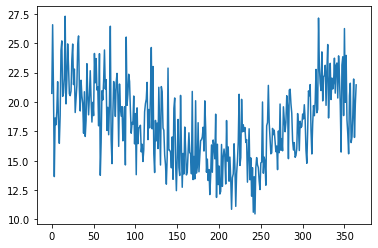

In [5]:
plt.plot(peaks)
plt.show()

In [6]:
times = df['Timestamp']
DoW = []
MoY = []

for i in range(0, len(loads), n):
    DoW.append(times[i].weekday())
    MoY.append(times[i].month)

In [7]:
peaksByDay = []

for i in range(7):
    x = peaks[i+5::7]
    peaksByDay.append(x)


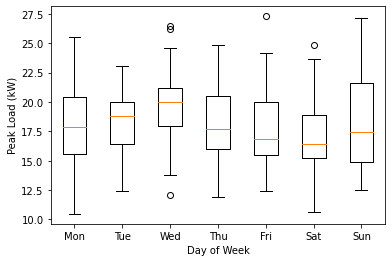

In [8]:
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.boxplot(peaksByDay)
plt.xlabel("Day of Week")
plt.ylabel("Peak Load (kW)")
plt.xticks([1,2,3,4,5,6,7], labels)
plt.show()

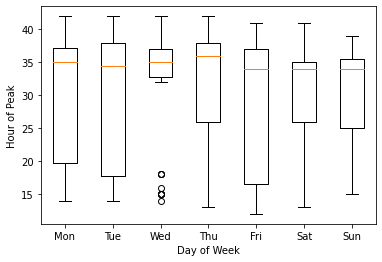

In [9]:
peakHoursByDay = []
for i in range(7):
    x = hourOfPeak[i+5::7]
    peakHoursByDay.append(x)

labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.boxplot(peakHoursByDay)
plt.xlabel("Day of Week")
plt.ylabel("Hour of Peak")
plt.xticks([1,2,3,4,5,6,7], labels)
plt.show()

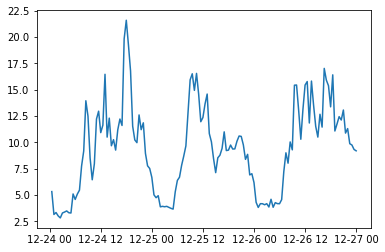

In [10]:
d = 357
plt.plot(times[d*48:d*48+3*48], loads[d*48:d*48+3*48])

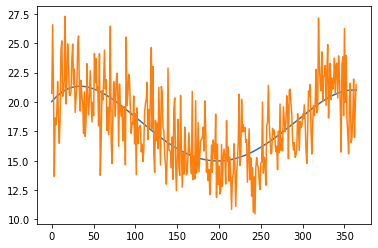

In [11]:
x = list(range(len(peaks)))
z = np.poly1d(np.polyfit(x,peaks,4))

plt.plot(x, z(x))
plt.plot(x, peaks)
plt.show()


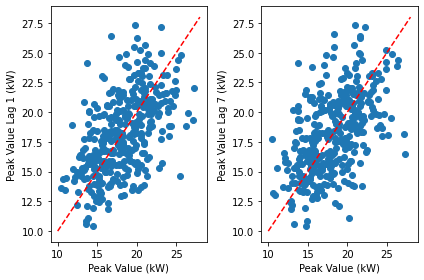

In [12]:
index = list(range(6))
peaks_orig = np.delete(peaks, index)
peaks_lag1 = np.delete(np.roll(peaks, 1), index)
peaks_lag7 = np.delete(np.roll(peaks, 7), index)
MoY_new = np.delete(MoY, index)

DoY = list(range(7,366))

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(peaks_orig, peaks_lag1)
plt.plot([10,28], [10,28], c="r",ls="--")
plt.xlabel("Peak Value (kW)")
plt.ylabel("Peak Value Lag 1 (kW)")

plt.subplot(1,2,2)
plt.scatter(peaks_orig, peaks_lag7)
plt.plot([10,28], [10,28], c="r",ls="--")
plt.xlabel("Peak Value (kW)")
plt.ylabel("Peak Value Lag 7 (kW)")
fig.tight_layout()
plt.show()

In [13]:
col = ['peaks_orig', 'peaks_lag1', 'peaks_lag7', 'MoY']
df = pd.DataFrame(list(zip(peaks_orig, peaks_lag1, peaks_lag7, MoY)), columns=col)

targetColumn = ['peaks_orig']
predictors = list(df.columns)[1:]
df[predictors] = df[predictors]/df[predictors].max()

X = df[predictors].values
y = df[targetColumn].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)

(287, 3)
(72, 3)


In [14]:
mlp = MLPRegressor(hidden_layer_sizes=(3,3,3), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

d:\Programs\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\Programs\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


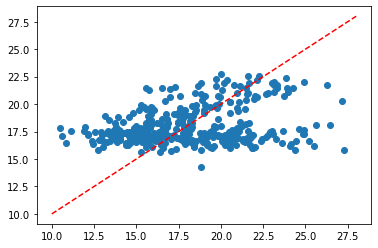

In [15]:
pred = mlp.predict(df[predictors])

plt.scatter(peaks_orig, pred)
plt.plot([10,28], [10,28], c="r",ls="--")

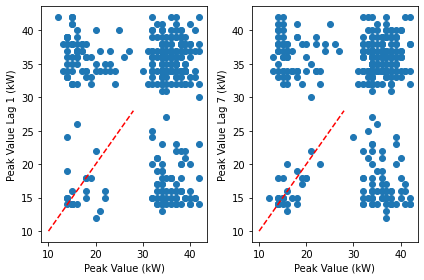

In [16]:
index = list(range(6))
# hour of peak
HoP = np.delete(hourOfPeak, index)
HoP_lag1 = np.delete(np.roll(hourOfPeak, 1), index)
HoP_lag7 = np.delete(np.roll(hourOfPeak, 7), index)
MoY_new = np.delete(MoY, index)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(HoP, HoP_lag1)
plt.plot([10,28], [10,28], c="r",ls="--")
plt.xlabel("Peak Value (kW)")
plt.ylabel("Peak Value Lag 1 (kW)")

plt.subplot(1,2,2)
plt.scatter(HoP, HoP_lag7)
plt.plot([10,28], [10,28], c="r",ls="--")
plt.xlabel("Peak Value (kW)")
plt.ylabel("Peak Value Lag 7 (kW)")
fig.tight_layout()
plt.show()

In [17]:
col = ['HoP', 'HoP_lag1', 'HoP_lag7', 'DoW']
df = pd.DataFrame(list(zip(HoP, HoP_lag1, HoP_lag7, np.delete(DoW, index))), columns=col)

targetColumn = ['HoP']
predictors = list(df.columns)[1:]
df[predictors] = df[predictors]/df[predictors].max()

X = df[predictors].values
y = df[targetColumn].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(251, 3)
(108, 3)


In [18]:
cls = MultinomialNB()
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

predictions = cls.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         6
          33       0.00      0.00      0.00         3
          34       0.16      1.00      0.27        17
          35       0.00    

d:\Programs\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are i

d:\Programs\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programs\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\Programs\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\Programs\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f

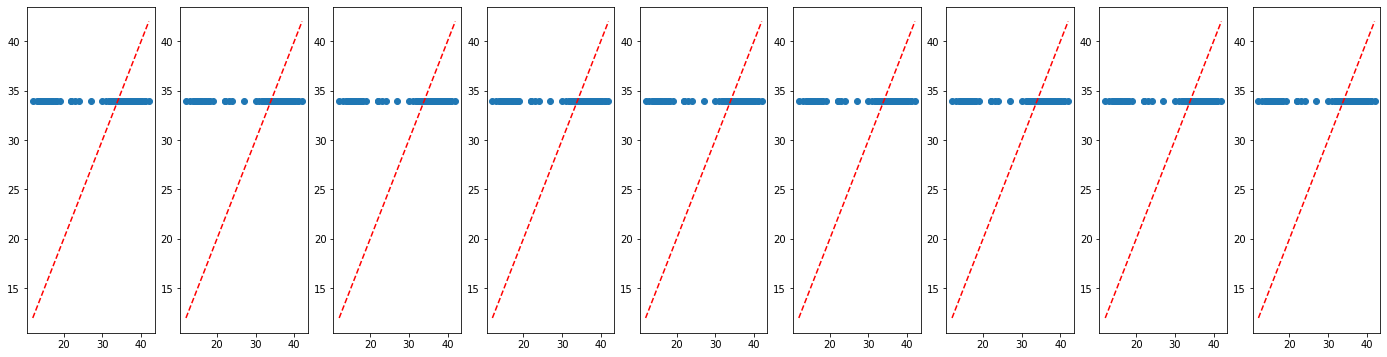

<Figure size 432x288 with 0 Axes>

In [19]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    #"QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

fig = plt.figure(figsize=(27, 6))
i = 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    #print(name)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    preds = cls.predict(X_test)

    low = min(min(y_test), min(preds))
    high = max((max(y_test), max(preds)))

    ax.scatter(y_test, preds)
    ax.plot([low,high], [low,high], c="r",ls="--")
    i += 1
plt.show()
plt.tight_layout()

